#### Um dos processos que mais tomam tempo é a estruturação do dataset.

#### Aqui, utilizaremos um dataset já presente no pytorch, que é o Mnist. Posteriormente, faremos a estruturação do nosso próprio dataset.

In [1]:
import torch
import torchvision
from torchvision import transforms, datasets

#### Criaremos um tensor para guardar dados de treino e outro para dados de teste. 

O método dataset.MNIST irá importar o dataset. O parâmetro transform utiliza métodos da biblioteca transform para fazer as transformações necessárias. Aqui, a única transformação que será feita será a de transformar os dados importados para o tipo Tensor.

In [2]:
train = datasets.MNIST("", train = True, download=True, 
                      transform = transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("", train = False, download=True, 
                      transform = transforms.Compose([transforms.ToTensor()]))

In [3]:
print("Train: ", train)
print("Test: ", test)

Train:  Dataset MNIST
    Number of datapoints: 60000
    Root location: 
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )
Test:  Dataset MNIST
    Number of datapoints: 10000
    Root location: 
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
           )


#### Agora que temos os dados brutos extraídos, vamos tratá-los um pouco.

Através do método torch.utils.data.DataLoader, podemos estruturar melhor os dados. Definindo batch_size, estaremos definindo o tamanho dos batches que serão enviados para treinamento por vez na nossa rede neural. Definindo shuffle=True, estaremos embaralhando os dados, evitando vieses.

In [4]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

Vamos visualizar um batch do trainset. Nele, veremos 10 matrizes de 28x28 pixels. Cada matriz corresponde a um número. Será mostrado também um tensor com a correspondência de cada matriz. Ex: Se a primeira matriz corresponder a um 2, será apresentado um 2 na primeira posição do Tensor.

In [5]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

#### Vamos ver como um único exemplo desse batch se parece.

obs: A variável data é um tensor. A primeira posição de data corresponde a um Tensor de features ou labels(entradas e saídas). A segunda posição de data corresponde ao número do elemento dentro do batch.

Exemplo: <li> data[0] corresponde a 10 Tensors que contém as imagens de entrada. </li> 
         <li> data[1] corresponde a 10 Tensors que contém o label de cada imagem(diz se é 1, 2, 3 etc) </li>
         <li> data[0][0] corresponde à primeira imagem de entrada do batch </li>
         <li> data[1][0] corresponde ao primeiro label do batch</li>

In [14]:
x, y = data[0][0], data[1][0]

print("x: ", x)
print("y: ", y)

x:  tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1255, 0.8549,
          1.0000, 0.9725, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.3412, 0.8392, 0.9922,
          0.9922, 0.4706, 0.0000, 0.0000, 0.0000, 0.0

#### Vamos visualizar se as features e labels estão com os índices pareados corretamente.

Antes de poder printar no matplotlib, devemos fazer um reshape(view) para o formato (28, 28), pois o formato atual é (1, 28, 28). Esse 1 é referente à quantidade de canais da imagem. 

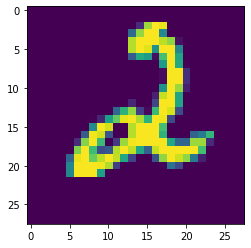

In [15]:
import matplotlib.pyplot as plt

plt.imshow(data[0][0].view(28, 28))

#### Balanceamento

Um fator bastante importante é verificar se o dataset está balanceado. Vamos supor que 80% dos elementos dele sejam imagens de números 2. Isso causaria sérios problemas de generalização no dataset. 

Vamos checar se nosso dataset está balanceado. Para isso, criaremos um dicionário que irá guardar a quantidade de cada label que possuímos no dataset.

In [17]:
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in trainset:
    xs, ys = data
    for y in ys:
       counter_dict[int(y)] += 1 
    
print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


Como podemos ver, os labels estão balanceados.